In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import tensorflow as tf

In [2]:
df = pd.read_csv('../Model Data/binary_outcome_no_stock.csv')
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Date'])
df.dropna(inplace=True)
df.sort_values(by='Search Date').head()

,Binary_Class,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,...,instacart jobs,gig economy,stimmy,trump,biden,china,Current Hospitalized COVID-19 Patients,Total Doses Administered,Daily Increase,Number of Flights
752,Low,2020-01-23,43,79,33,20,84,19,76,40,...,20,13,0,10,1,62,0.0,0.0,0.0,158666.0
751,Low,2020-01-24,52,78,42,22,75,16,72,38,...,14,14,0,10,1,75,0.0,0.0,0.0,179441.0
750,Low,2020-01-25,39,69,14,33,56,19,84,42,...,23,4,0,10,1,76,0.0,0.0,0.0,170708.0
749,Low,2020-01-26,38,69,41,23,55,16,61,39,...,21,12,0,9,1,67,0.0,0.0,0.0,174865.0
748,Low,2020-01-27,48,82,22,24,80,18,60,40,...,19,6,0,10,1,65,0.0,0.0,0.0,171934.0


In [3]:
df.sort_values(by='Search Date').tail()

,Binary_Class,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,...,instacart jobs,gig economy,stimmy,trump,biden,china,Current Hospitalized COVID-19 Patients,Total Doses Administered,Daily Increase,Number of Flights
14,High,2022-01-30,39,75,100,35,52,14,81,38,...,15,3,0,3,2,25,132730.71,547266020.0,478132.0,194573.0
13,High,2022-01-31,42,90,45,25,72,14,71,38,...,14,2,0,2,2,24,129780.71,547739194.0,473174.0,197247.0
12,High,2022-02-01,43,88,17,23,70,14,80,32,...,17,1,0,2,2,25,126537.14,548321220.0,582026.0,199407.0
11,Low,2022-02-02,37,87,31,27,68,14,63,28,...,14,6,0,2,2,24,123137.57,548648777.0,327557.0,182400.0
10,Low,2022-02-03,42,83,28,30,75,15,59,26,...,21,9,0,2,2,25,119692.43,548792878.0,144101.0,162754.0


In [4]:
df.shape

(743, 76)

In [5]:
df.dtypes

Binary_Class                               object
Search Date                                object
alcoholism                                  int64
anxiety                                     int64
athleisure                                  int64
                                           ...   
china                                       int64
Current Hospitalized COVID-19 Patients    float64
Total Doses Administered                  float64
Daily Increase                            float64
Number of Flights                         float64
Length: 76, dtype: object

In [6]:
df2 = df.drop(columns=['Search Date'])

binary_cat = df2.dtypes[df2.dtypes == "object"].index.tolist()
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df2[binary_cat]))
encode_df.columns = enc.get_feature_names(binary_cat)

encode_df.head()

,Binary_Class_High,Binary_Class_Low
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [7]:
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(binary_cat,1)
df.head()

,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,flu symptoms,...,stimmy,trump,biden,china,Current Hospitalized COVID-19 Patients,Total Doses Administered,Daily Increase,Number of Flights,Binary_Class_High,Binary_Class_Low
10,2022-02-03,42,83,28,30,75,15,59,26,9,...,0,2,2,25,119692.43,548792878.0,144101.0,162754.0,1.0,0.0
11,2022-02-02,37,87,31,27,68,14,63,28,9,...,0,2,2,24,123137.57,548648777.0,327557.0,182400.0,1.0,0.0
12,2022-02-01,43,88,17,23,70,14,80,32,8,...,0,2,2,25,126537.14,548321220.0,582026.0,199407.0,1.0,0.0
13,2022-01-31,42,90,45,25,72,14,71,38,9,...,0,2,2,24,129780.71,547739194.0,473174.0,197247.0,1.0,0.0
14,2022-01-30,39,75,100,35,52,14,81,38,9,...,0,3,2,25,132730.71,547266020.0,478132.0,194573.0,0.0,1.0


In [8]:
X = df.drop(columns=['Binary_Class_High','Binary_Class_Low','Search Date'])
y= df['Binary_Class_High']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=50, activation="relu", input_dim=74))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
fit_model = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 2898801.7500 - accuracy: 0.5811
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 731000.5000 - accuracy: 0.5446
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 69640.3906 - accuracy: 0.5792
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 35723.9883 - accuracy: 0.5883
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 42418.7617 - accuracy: 0.6284
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 102353.0234 - accuracy: 0.5956
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 46544.2461 - accuracy: 0.6084
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 52669.3789 - accuracy: 0.6211
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 72711.7656 - accuracy: 0.6430
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - l

18/18 [==============================] - 0s 3ms/step - loss: 26033.2285 - accuracy: 0.7413
Epoch 80/100
18/18 [==============================] - 0s 3ms/step - loss: 46091.9531 - accuracy: 0.7450
Epoch 81/100
18/18 [==============================] - 0s 3ms/step - loss: 72034.1328 - accuracy: 0.7377
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 26802.9824 - accuracy: 0.7687
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 54675.6875 - accuracy: 0.7359
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 28506.5586 - accuracy: 0.7268
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 46310.1250 - accuracy: 0.7395
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 33643.7930 - accuracy: 0.7013
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 65207.5117 - accuracy: 0.7359
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 427

In [11]:
model_loss, model_accuracy = model.evaluate(X_test,y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 [==============================] - 0s 3ms/step - loss: 123482.1719 - accuracy: 0.7174
Loss: 123482.171875, Accuracy: 0.717391312122345


In [12]:
X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_test).transform(X_test)
fit_modelS = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 5ms/step - loss: 0.5431 - accuracy: 0.8106
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.8452
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.8670
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2632 - accuracy: 0.8834
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2364 - accuracy: 0.9016
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2177 - accuracy: 0.9089
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2019 - accuracy: 0.9107
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1903 - accuracy: 0.9126
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 0.9235
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1671 - accuracy: 0.9308
Epoch 11/

18/18 [==============================] - 0s 5ms/step - loss: 0.0303 - accuracy: 1.0000
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0297 - accuracy: 1.0000
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 1.0000
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 1.0000
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 1.0000
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 93/100


In [13]:
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 [==============================] - 0s 4ms/step - loss: 0.1851 - accuracy: 0.9130
Loss: 0.18510790169239044, Accuracy: 0.9130434989929199


In [14]:
X_train_scaled = MinMaxScaler().fit(X_train).transform(X_train)
X_test_scaled = MinMaxScaler().fit(X_test).transform(X_test)
fit_modelM = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3872 - accuracy: 0.8288
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3474 - accuracy: 0.8761
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3174 - accuracy: 0.8743
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3044 - accuracy: 0.8871
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.2916 - accuracy: 0.8944
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2809 - accuracy: 0.8962
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.9144
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2682 - accuracy: 0.9035
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2683 - accuracy: 0.9217
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.9107
Epoch 11/

18/18 [==============================] - 0s 3ms/step - loss: 0.1424 - accuracy: 0.9636
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1418 - accuracy: 0.9617
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9672
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9617
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1387 - accuracy: 0.9636
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1390 - accuracy: 0.9617
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1385 - accuracy: 0.9654
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1367 - accuracy: 0.9690
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1357 - accuracy: 0.9690
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1358 - accuracy: 0.9654
Epoch 93/100


In [15]:
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.8478
Loss: 0.2759894132614136, Accuracy: 0.8478260636329651


<AxesSubplot:>

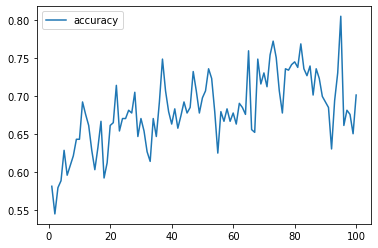

In [16]:
history = pd.DataFrame(fit_model.history)
history.index += 1
history.plot(y="accuracy")

<AxesSubplot:>

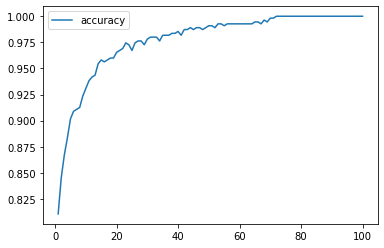

In [17]:
historyS = pd.DataFrame(fit_modelS.history)
historyS.index += 1
historyS.plot(y="accuracy")

<AxesSubplot:>

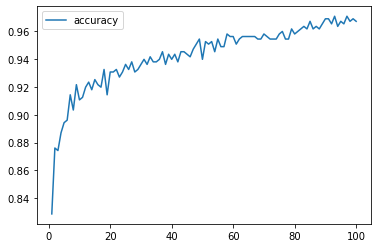

In [18]:
historyM = pd.DataFrame(fit_modelM.history)
historyM.index += 1
historyM.plot(y="accuracy")